# Calculate Rate of Return

## Import libraries

In [ ]:
%pip install pandas_datareader

In [ ]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

## Load data

In [ ]:
PG = pd.read_csv('PG_1995-03_23_2017.csv', index_col = 'Date')

or:

In [ ]:
PG = wb.DataReader('PG', data_source='yahoo', start='1995-1-1')

## Calculate Simple Rate of Return

$$
\frac{P_1 - P_0}{P_0} = \frac{P_1}{P_0} - 1
$$

In [ ]:
PG['simple_return'] = (PG['Close'] / PG['Close'].shift(1)) - 1
PG['simple_return']

Average return:

In [ ]:
avg_returns_d = PG['simple_return'].mean()
avg_returns_d

Annual average return:

In [ ]:
avg_returns_a = PG['simple_return'].mean() * 250
f'{avg_returns_a*100:.3f}%'

## Plot returns

In [ ]:
PG['simple_return'].plot(figsize=(8, 5))
plt.show()

## Calculate Logarithmic Rate of Return

$$
ln(\frac{P_t}{P_{t-1}})
$$

In [ ]:
PG['log_return'] = np.log(PG['Adj Close'] / PG['Adj Close'].shift(1))
PG['log_return']

Annual average return:

In [ ]:
log_return_a = PG['log_return'].mean() * 250
f'{log_return_a*100:.3f}%'

## Compare the performance of multiple stocks

In [ ]:
mydata = pd.read_csv('4_stocks_1995_2017.csv', index_col='Date')
mydata.info()

In [ ]:
mydata.tail()

Make all the stock prices start from 100 and plot it:

$$
\frac {P_t}{P_0} * 100
$$

The idea behind is to compare the behavior of the four different stocks as if they were all starting from the same value 100.

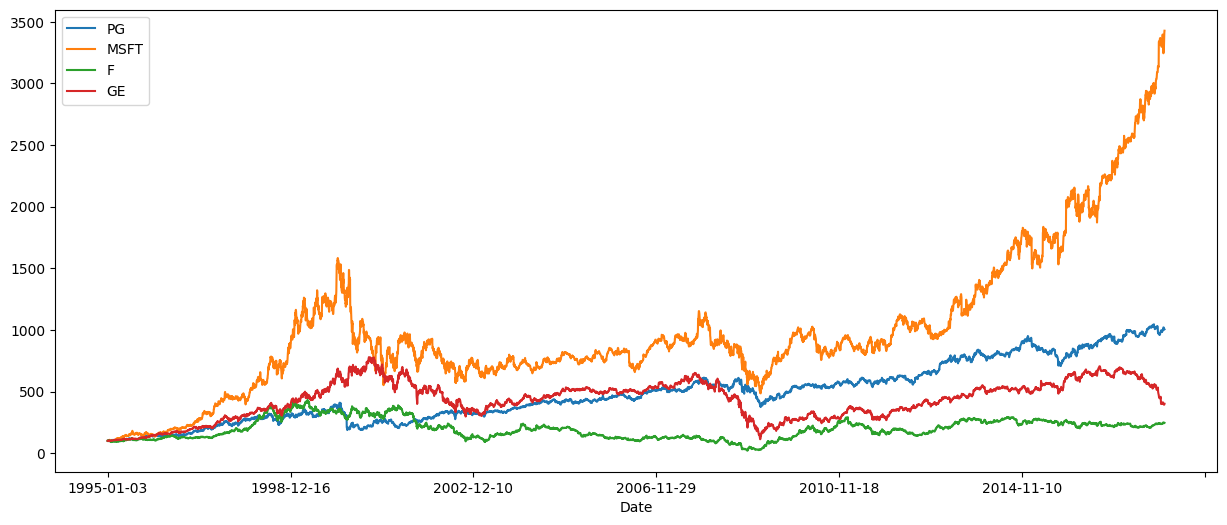

In [29]:
(mydata / mydata.iloc[0] * 100).plot(figsize = (15, 6));
plt.show()

## Calculating the Rate of Return of a Portfolio of Securities

In [35]:
# get the average return of each stock using sample rate of return
returns = (mydata / mydata.shift(1)) - 1
avg_returns = returns.mean() * 250
avg_returns

PG      0.125201
MSFT    0.202795
F       0.118984
GE      0.102481
dtype: float64

In [37]:
# calculate the portfolio return
weights = np.array([0.25, 0.25, 0.25, 0.25])
avg_return = np.dot(avg_returns, weights)
avg_return

0.13736516005309746